In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
dataset = load_boston()

X = dataset.data
y = dataset.target[:,np.newaxis]

print("Total samples in our dataset is: {}".format(X.shape[0]))
print("Total variables (predictors) in our dataset is: {}".format(X.shape[1]))

Total samples in our dataset is: 506
Total variables (predictors) in our dataset is: 13


In [3]:
def calc_cost(y, x, params):
    '''
    Given parameters/weights/coefficients, this function calculates the cost 
    cost is given as Mean Square Error between actual and predicted values
    '''
    n = len(y)
    hx = (x@params)
    mse = (1/(2*n))*np.sum((hx-y)**2)
    return mse

In [4]:
def gradient_descent(x, y, params, learning_rate, num_iters):
    n = len(y)
    j_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        dj = (1/n)*(x.T@((x@params)-y))
        params = params - learning_rate*dj
        j_history[i] = calc_cost(y, x, params)
    return (j_history, params)
        

In [5]:
# Normalize X
n = len(y)

mu = np.mean(X,0)
sigma = np.std(X,0)

X = (X-mu)/sigma

X = np.hstack((np.ones((n,1)),X))
n_features = np.size(X,1)
params = np.zeros((n_features,1))

In [6]:
# Perform Gradient Descent
n_iters = 1500
learning_rate = 1e-3

initial_cost = calc_cost(y, X, params)

print("Initial Cost:{0}".format(initial_cost))

Costs, params = gradient_descent(X, y, params, learning_rate, n_iters)

print("Final Parameters: {0}".format(params))

final_cost = calc_cost(y, X, params)

print("Final Cost:{0}".format(final_cost))

Initial Cost:296.0734584980237
Final Parameters: [[17.50882955]
 [-0.59925666]
 [ 0.44475082]
 [-0.51319271]
 [ 0.85890553]
 [-0.46314076]
 [ 2.95449704]
 [-0.19076074]
 [-1.03806353]
 [ 0.18701864]
 [-0.44429382]
 [-1.60024791]
 [ 0.73320519]
 [-2.65133555]]
Final Cost:25.044757271113504


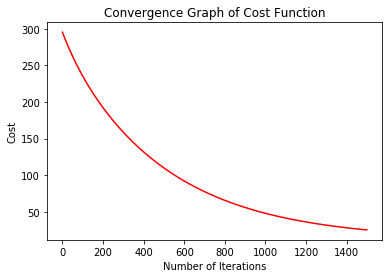

In [7]:
plt.plot(range(len(Costs)), Costs, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()